In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
log = pd.read_csv("C:/Users/Max/Documents/Data Fest/logs.csv")

C:\Users\Max\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (34,38,39,40,47,50,53,54,57,58,59,60,62,68,70,72,73,74,76,77,78,81,85,88,89,90,91,92,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,118,120,121,122,123,129,131) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [8]:
log.head()

,row_id,player_id,school,wave,session,date,event_id,event_description,event_category,event_time,...,piece2_id,piece3_id,opponent_point_loss,player_points,opponent_points,old_rating,new_rating,priority_type_that_went_to_zero,epilogue_item_id,item_locked_unlocked_state
0,1,6427001,3561,"3561 (T,TH) Spring 2013",Session 1,2013-03-07,600,Player selects age,Avatar Creation,3M 18S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,6427001,3561,"3561 (T,TH) Spring 2013",Session 1,2013-03-07,601,Player selects gender,Avatar Creation,3M 19S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,6427001,3561,"3561 (T,TH) Spring 2013",Session 1,2013-03-07,602,Player commits to age and gender,Avatar Creation,3M 25S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,6427001,3561,"3561 (T,TH) Spring 2013",Session 1,2013-03-07,603,Player selects avatar,Avatar Creation,3M 30S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,6427001,3561,"3561 (T,TH) Spring 2013",Session 1,2013-03-07,604,Player commits to avatar and name,Avatar Creation,4M 12S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
log2 = log[['row_id','player_id','event_id','data_values','players_cred_total','minigame_level']]

In [52]:
knowledge = log2[(log.event_id == 420)]

In [53]:
knowledge

,row_id,player_id,event_id,data_values,players_cred_total,minigame_level
1344,1345,6427001,420,"0,[38]",38.0,0.0
1704,1705,6427001,420,"0,[56]",56.0,0.0
1845,1846,6427001,420,"0,[64]",64.0,0.0
2745,2746,6427001,420,"1,[46]",46.0,1.0
3350,3351,6427001,420,"2,[52]",52.0,2.0
...,...,...,...,...,...,...
2103261,2103262,65670032,420,"1,[56]",56.0,1.0
2105237,2105238,65670032,420,"2,[72]",72.0,2.0
2105383,2105384,65670032,420,"3,[68]",68.0,3.0
2106050,2106051,65670032,420,"5,[76]",76.0,5.0


In [99]:
knowledge2 = knowledge.groupby(['player_id'])['players_cred_total'].mean() # Grouped each player with their average score on the Knowledge based minigames

In [100]:
knowledge2

player_id
6427001     60.521739
6427002     52.666667
6427004     63.111111
6427006     66.470588
6427007     40.000000
              ...    
6626005     56.054054
6626006     38.166667
6626007     44.461538
65670031    67.400000
65670032    69.333333
Name: players_cred_total, Length: 163, dtype: float64

In [101]:
log_r = log[['row_id','player_id','event_id','player_points']]

In [103]:
refusal = log_r[(log_r.event_id == 515)]

In [104]:
refusal

,row_id,player_id,event_id,player_points
1973,1974,6427001,515,60.0
2866,2867,6427001,515,60.0
2923,2924,6427001,515,110.0
3557,3558,6427001,515,60.0
3609,3610,6427001,515,120.0
...,...,...,...,...
2103576,2103577,65670032,515,150.0
2103681,2103682,65670032,515,150.0
2105595,2105596,65670032,515,150.0
2105630,2105631,65670032,515,150.0


In [107]:
refusal2 = refusal.groupby(['player_id'])['player_points'].mean()

In [108]:
refusal2

player_id
6427001     113.333333
6427004     116.153846
6427006     132.500000
6427008     115.000000
6427011     120.666667
               ...    
6626005      84.705882
6626006      22.142857
6626007     106.250000
65670031    137.500000
65670032    145.714286
Name: player_points, Length: 153, dtype: float64

In [117]:
plot_df = pd.concat([knowledge2,refusal2],axis = 1)

In [120]:
plot_df

,players_cred_total,player_points
player_id,,
6427001,60.521739,113.333333
6427002,52.666667,NaN
6427004,63.111111,116.153846
6427006,66.470588,132.500000
6427007,40.000000,NaN
...,...,...
6626005,56.054054,84.705882
6626006,38.166667,22.142857
6626007,44.461538,106.250000


Text(0, 0.5, 'Refusal minigame')

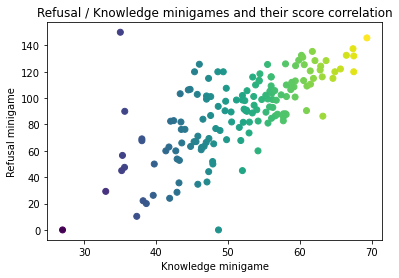

In [144]:
x = plot_df.players_cred_total
y = plot_df.player_points
t = x

plt.scatter(x,y,c=t, label ="yo")
plt.title("Refusal / Knowledge minigames and their score correlation")
plt.xlabel("Knowledge minigame")
plt.ylabel("Refusal minigame")
